In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats



import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [33]:
#NASA Exoplanet Archieve of WASP-19b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-19b

In [34]:
df = pd.read_csv("WASP_19b_literature.csv")#, header=None)
df = df.set_index('Parameter')
df = df.drop(columns=df.columns[0])


In [35]:
def read_df_params(df_param_list, df_ref_list, add_none=False):
    """
    Reading a row of literature values for a given parameter and converting 
    it into an array.

    Format that it will be converted to: [value, +error, -error]

    Format reading examples:
    "0.028+/-0.015" -> [0.028, 0.015, -0.015]
    "0.3+0.5-0.1" -> [0.3, 0.5, -0.1]
    "3.0" -> [3.0, 0.0, 0.0]


    Parameters
    ----------
    df_params_list : array_like, str
        Array of literature values of a given parameter.

    df_ref_list : array_like, str
        Array of authors/references that published the given parameter.

    add_none : bool
        False -> Only return values that authors have published
        True  -> Return all values     

    Returns
    -------
        param_list : ndarray
            An array of [value, +error, -error].
        
        ref_list : ndarray, str
            An array of authors.
    
    """

    param_list = []
    ref_list = []

    p_mask = np.where(df_param_list=="---", False, True) #Masking values

    for param, pmask, ref in zip(df_param_list, p_mask, df_ref_list):
        if pmask == True:
            if "+/-" in param: #If param in format "123+/-12"
                param = re.split('\+\/\-', param)
                param = [float(param[0]), float(param[1]), float('-' + param[1])]

            elif ("+" in param) and ("-" in param): #If param in format "123+12-23"
                if param[0] == "-": #If param value is negative
                    param = e[1:]
                    param_tmp = re.split('\+|\-', param)
                    param = [float(param_tmp[0]), float(param_tmp[1]), float('-' + param_tmp[1])]

                else: #param value is positive
                    param_tmp = re.split('\+|\-', param)
                    param = [float(param_tmp[0]), float(param_tmp[1]), float('-' + param_tmp[1])]
                    
            else: #If param value has no error
                param = [float(param), 0.0, 0.0]

            param_list.append(param)
            ref_list.append(ref)

        if (add_none == True) and (pmask == False):
            param_list.append(None)
            ref_list.append(ref)


    param_list = np.array(param_list)
    ref_list = np.array(ref_list)

    return [param_list, ref_list]
        

In [36]:
df_ref_list = df.columns

df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
df_R_list = df.loc['R'] #Planetary radius row
df_a_list = df.loc['a'] #Semi-major axis row
df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
df_w_list = df.loc['w']
df_color = df.loc['colour'] #Colours

e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)



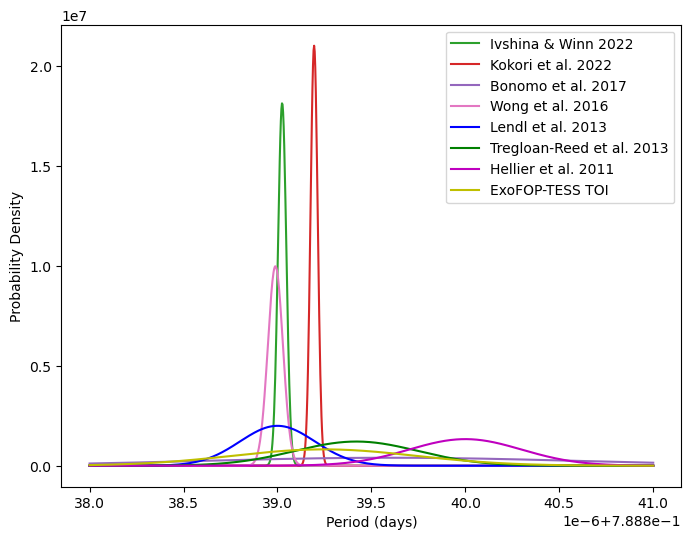

In [60]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.788838, 0.788841, 1000)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

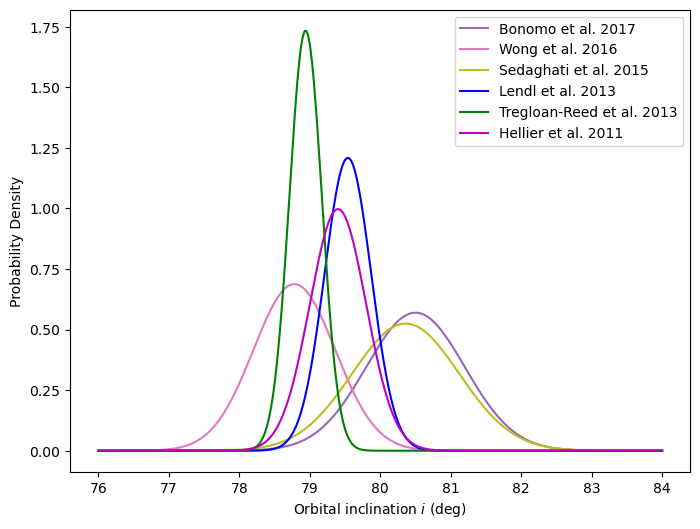

In [63]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(76, 84, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Orbital inclination $i$ (deg)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

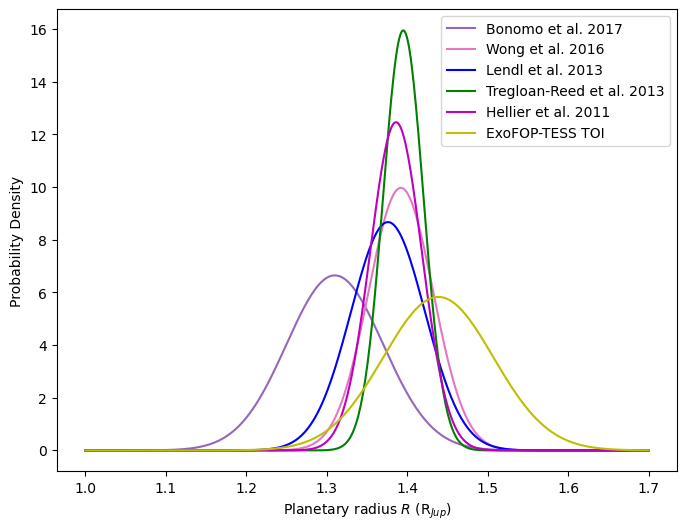

In [69]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(1, 1.7, 500)
for R_obj, author in zip(R_list, R_ref_list):
    mu, upper, lower = R_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planetary radius $R$ (R$_{Jup}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

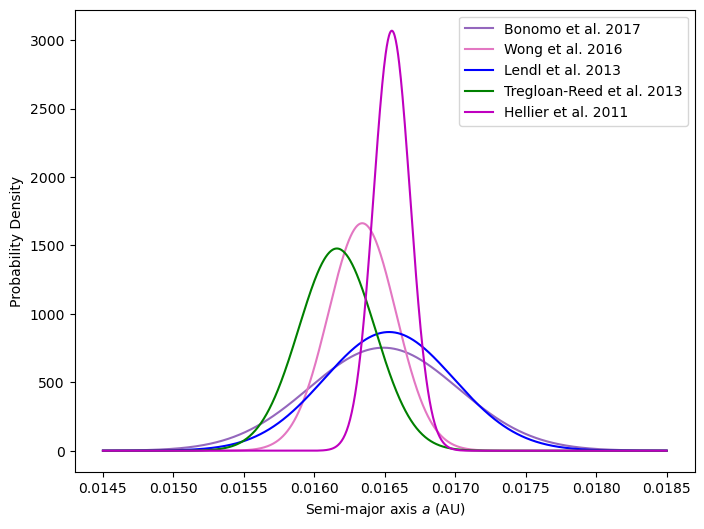

In [78]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.0145, 0.0185, 1000)
for a_obj, author in zip(a_list, a_ref_list):
    mu, upper, lower = a_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Semi-major axis $a$ (AU)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

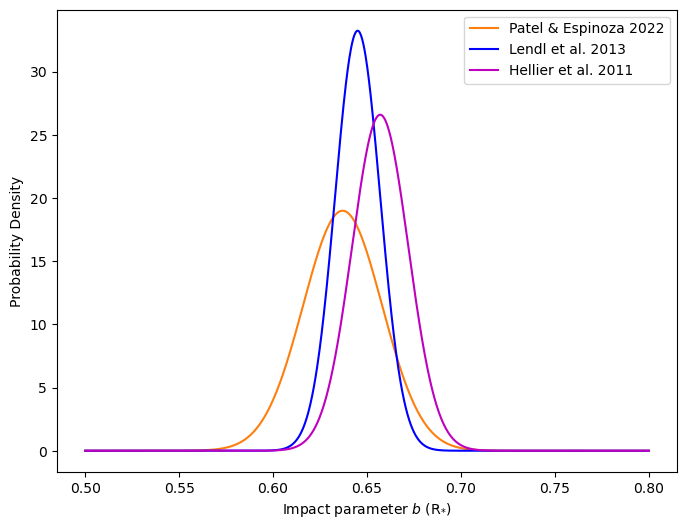

In [80]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.5, 0.8, 1000)
for b_obj, author in zip(b_list, b_ref_list):
    mu, upper, lower = b_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Impact parameter $b$ (R$_{*}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

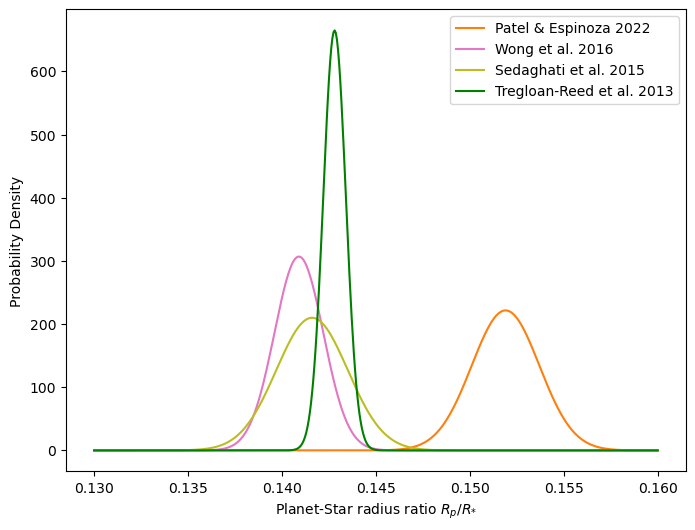

In [85]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.13, 0.16, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")
ax.legend()
plt.show()